# 데이터 분석 이론

1. 시간의 흐름에 따라 매출, 주문고객수, 주문단가의 추이는 어떻게 달라지는가?
2. 리텐션 분석: 시간의 흐름에 따라 고객들은 얼마나 남고 얼마나 이탈했는가?
3. RFM 분석: 고객의 행동에 따라 고객을 유형화 해보자.

- 리텐션 분석이란?
    - 유저가 제품을 사용한 이후 일정 기간이 지난 시점에 제품을 계속 사용하고있는지 유저의 잔존과 이탈을 트래킹하는 분석
    - Day0에 앱에 방문한 유저 중 Day1에 다시 재방문한 유저의 비율이 리텐션
    - 일반적으로 리텐션이 높으면 유저가 서비스를 주기적으로 사용한다는 뜻으로 해석할 수 있어, 유저의 참여와 충성도 같은 지표를 높이기위한 제품 방향성을 정하는데 중요한 지표로 활용

- 행동 리텐션을 분석하는 기준은 방문, 구매, 장바구니 등 정할 수 있다.  
Olist 데이터에서는 구매를 기준으로 분석하고자 한다.  
ex) 이번 달 구매한 사람이 다음 달에 구매하는지  
리텐션 주기도 설정할 수 있다.

- RFM 분석이란?
    - Recency, Frequency, Monetary를 기반으로 고객을 유형화하는 방법
        - Recency(최근성): 고객이 얼마나 최근에 구매를 했는지
        - Frequency(빈도): 고객이 얼마나 자주 구매를 하는지
        - Monetary(금액): 고객이 구매한 총 금액
    - 고객 유형을 세분화하여 맞춤형 전략을 구상할 수 있다.
        - ex) 총 구매금액은 낮지만 자주 방문하는 유저 vs 최근에 큰 금액을 구매했지만 자주 방문하지는 않았던 유저


In [1]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.rc('font', family=fontprop.get_name())

# Unicode 마이너스 설정
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_orders = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_orders_dataset.csv',encoding='cp949')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

- 주문승인시간, 업체도착시간, 고객도착시간의 결측치가 존재

In [6]:
df_orders[df_orders.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [7]:
# 주문 승인, 업체 전달, 고객 전달 날짜에 결측치가 있는 행을 추출
nan_rows = df_orders[df_orders[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1)]
nan_rows.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaN,2018-03-23 00:00:00


In [8]:
nan_approved_rows = nan_rows[nan_rows['order_approved_at'].isnull()]

# 주문 승인 날짜가 NaN인 행에서 업체 전달 날짜와 고객 전달 날짜도 NaN인지 확인
nan_approved_all_nan = nan_approved_rows[['order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().all(axis=1)

# 주문 승인 날짜가 NaN인 행들 중에서 업체 전달 날짜 또는 고객 전달 날짜가 NaN이 아닌 행을 확인
non_nan_carrier_or_customer = nan_approved_rows[~nan_approved_all_nan]

# 결과 확인
non_nan_carrier_or_customer[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']]

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
5323,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33
16567,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06
19031,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38
22663,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47
23156,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19
26800,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01
38290,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58
39334,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23
48401,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19
61743,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03


- 주문 승인 날짜가 NaN이면 업체 전달 날짜와 고객 전달 날짜도 NaN일 것이다? X
- 위의 표, 주문 승인 날짜만 NaN인 행 존재함 확인

In [9]:
nan_rows['order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [10]:
nan_rows['order_status'].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: count, dtype: int64

- 주문승인, 업체전달, 고객전달 날짜에 결측치가 하나라도 존재하는 경우의 주문상태는 다양하다.
- 생성됨: 고객이 주문을 완료한 상태 approved 전 단계이다.

In [11]:
df_orders.duplicated().sum()

np.int64(0)

- 중복된 행이 하나도 없다?  
=> 구매 리텐션 분석 불가능, RFM 분석 불가능

# 고객 주문 시간

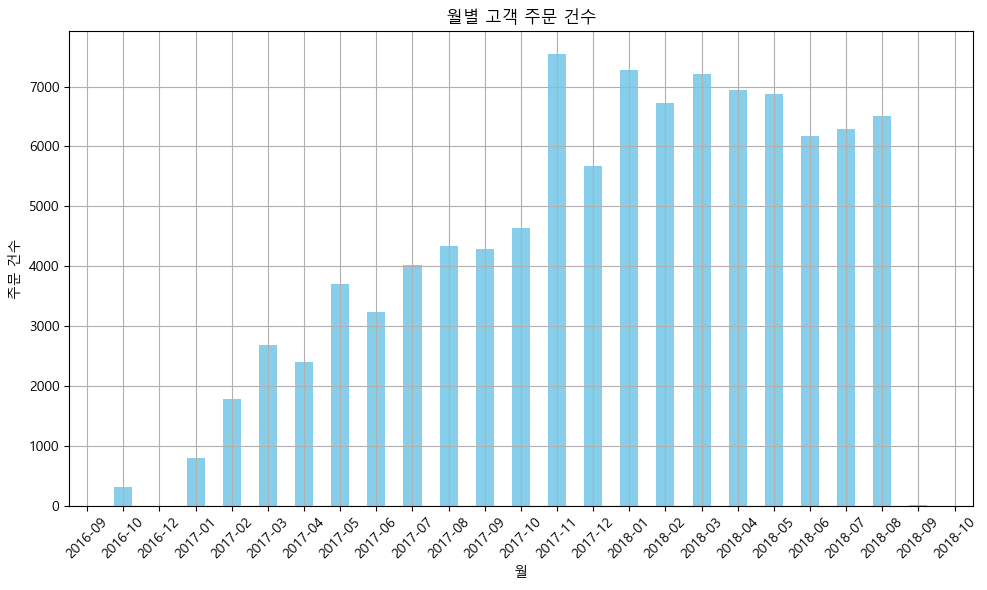

In [12]:
# 'order_purchase_timestamp'을 datetime 형식으로 변환 (이미 되어 있으면 생략 가능)
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], errors='coerce')

# 월별로 주문 건수를 계산
df_orders['order_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')
monthly_order_counts = df_orders.groupby('order_month').size()

# 막대그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
monthly_order_counts.plot(kind='bar', color='skyblue')

# 한국어로 제목과 축 라벨 설정
plt.title('월별 고객 주문 건수')
plt.xlabel('월')
plt.ylabel('주문 건수')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

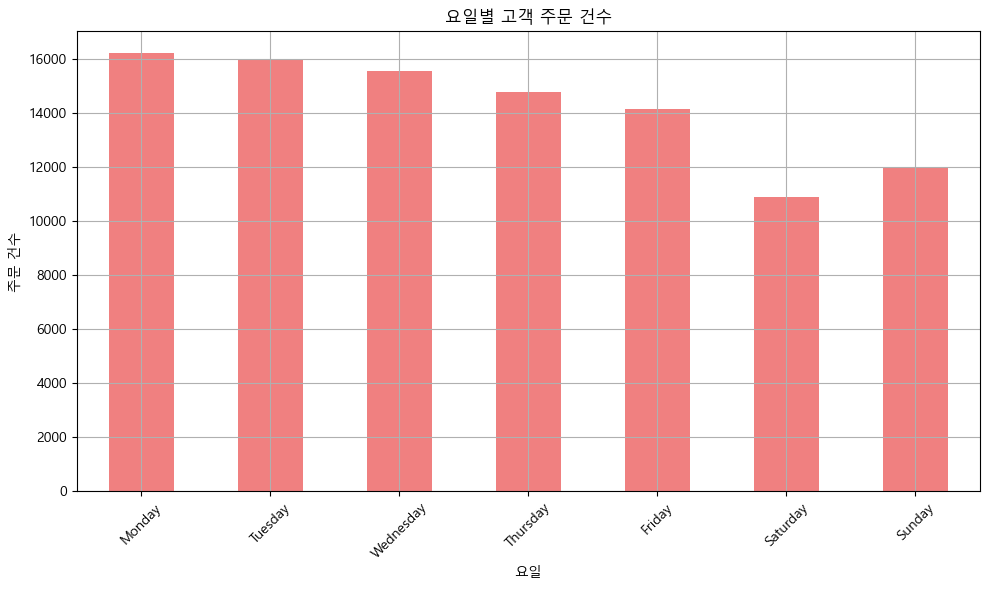

In [13]:
# 'order_purchase_timestamp'에서 요일(day of the week) 추출
df_orders['order_weekday'] = df_orders['order_purchase_timestamp'].dt.day_name()

# 요일별로 주문 건수를 계산
weekday_order_counts = df_orders.groupby('order_weekday').size()

# 요일 순서를 맞추기 위해 정렬
weekday_order_counts = weekday_order_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# 막대그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
weekday_order_counts.plot(kind='bar', color='lightcoral')

# 한국어로 제목과 축 라벨 설정
plt.title('요일별 고객 주문 건수')
plt.xlabel('요일')
plt.ylabel('주문 건수')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

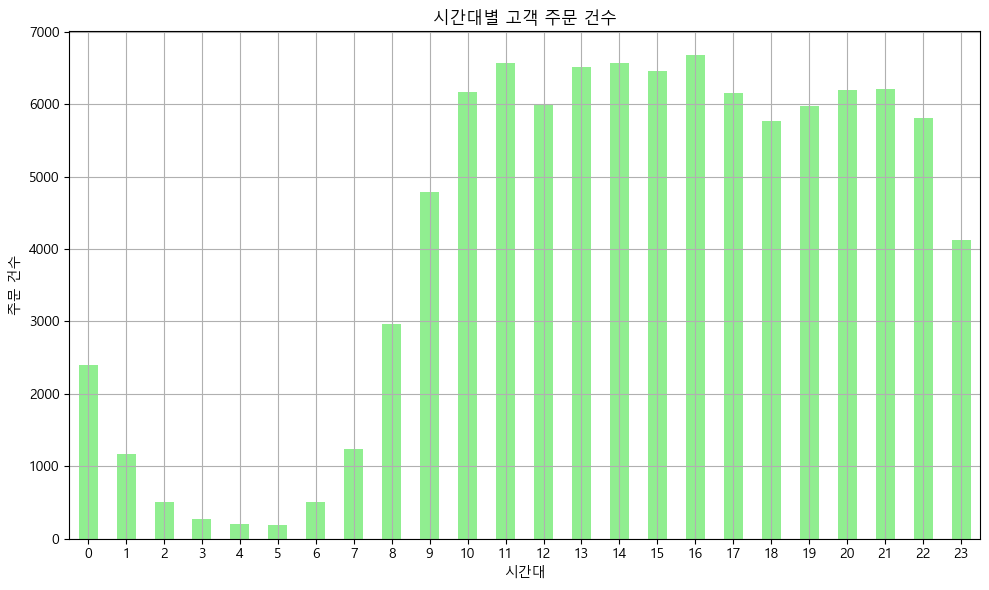

In [14]:
# 'order_purchase_timestamp'에서 시간(hour) 추출
df_orders['order_hour'] = df_orders['order_purchase_timestamp'].dt.hour

# 시간대별로 주문 건수를 계산
hourly_order_counts = df_orders.groupby('order_hour').size()

# 막대그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
hourly_order_counts.plot(kind='bar', color='lightgreen')

# 한국어로 제목과 축 라벨 설정
plt.title('시간대별 고객 주문 건수')
plt.xlabel('시간대')
plt.ylabel('주문 건수')

plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# 주문 처리 시간

### 고객주문-주문승인

In [15]:
df_orders['order_purchase_timestamp'].isna().sum()
# 결측값 없음

np.int64(0)

In [16]:
# 고객 주문 날짜와 주문 승인 날짜의 차이를 계산하기 위해 datetime 형식으로 변환
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'], errors='coerce')
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'], errors='coerce')

# time_difference_0 컬럼 생성 
df_orders['time_difference_0'] = df_orders['order_approved_at'] - df_orders['order_purchase_timestamp']

print(df_orders[['order_purchase_timestamp', 'order_approved_at', 'time_difference_0']].head(10))

  order_purchase_timestamp   order_approved_at time_difference_0
0      2017-10-02 10:56:33 2017-10-02 11:07:15   0 days 00:10:42
1      2018-07-24 20:41:37 2018-07-26 03:24:27   1 days 06:42:50
2      2018-08-08 08:38:49 2018-08-08 08:55:23   0 days 00:16:34
3      2017-11-18 19:28:06 2017-11-18 19:45:59   0 days 00:17:53
4      2018-02-13 21:18:39 2018-02-13 22:20:29   0 days 01:01:50
5      2017-07-09 21:57:05 2017-07-09 22:10:13   0 days 00:13:08
6      2017-04-11 12:22:08 2017-04-13 13:25:17   2 days 01:03:09
7      2017-05-16 13:10:30 2017-05-16 13:22:11   0 days 00:11:41
8      2017-01-23 18:29:09 2017-01-25 02:50:47   1 days 08:21:38
9      2017-07-29 11:55:02 2017-07-29 12:05:32   0 days 00:10:30


In [17]:
df_orders['time_difference_0'].describe()

count                        99281
mean     0 days 10:25:08.739486910
std      1 days 02:02:16.813098347
min                0 days 00:00:00
25%                0 days 00:12:54
50%                0 days 00:20:36
75%                0 days 14:34:51
max              187 days 21:10:50
Name: time_difference_0, dtype: object

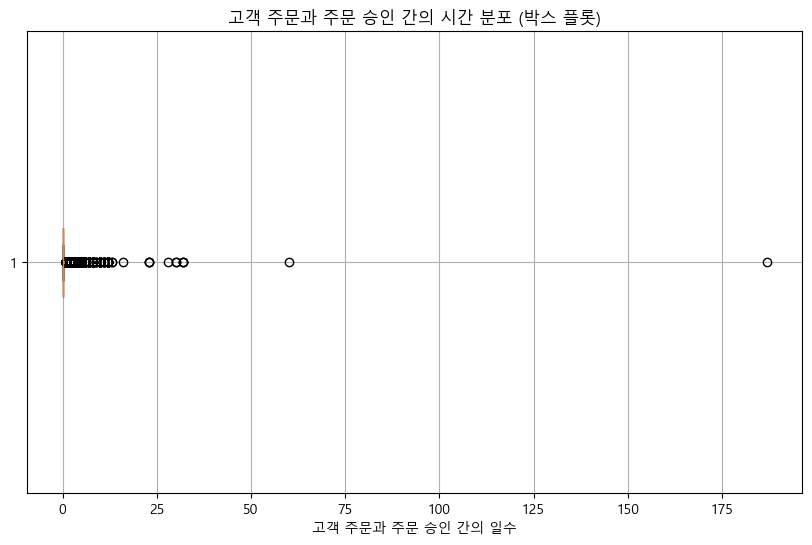

In [18]:
days_diff = df_orders['time_difference_0'].dropna().dt.days

plt.figure(figsize=(10, 6))
plt.boxplot(days_diff, vert=False, patch_artist=True)

# 한국어로 제목과 축 라벨 설정
plt.title('고객 주문과 주문 승인 간의 시간 분포 (박스 플롯)')
plt.xlabel('고객 주문과 주문 승인 간의 일수')

plt.grid(True)

plt.show()

In [19]:
# 'time_difference_0' 값이 작은 것부터 오름차순으로 정렬한 후 상위 10개의 행을 출력
df_orders_sorted = df_orders.sort_values(by='time_difference_0').head(10)

# 결과 출력
df_orders_sorted[['order_purchase_timestamp', 'order_approved_at', 'time_difference_0']]

,order_purchase_timestamp,order_approved_at,time_difference_0
76985,2017-03-13 20:48:35,2017-03-13 20:48:35,0 days
87109,2017-03-14 23:39:12,2017-03-14 23:39:12,0 days
77923,2017-03-14 11:26:21,2017-03-14 11:26:21,0 days
84191,2017-03-21 19:25:23,2017-03-21 19:25:23,0 days
36928,2017-03-22 17:26:40,2017-03-22 17:26:40,0 days
73538,2017-03-10 07:58:13,2017-03-10 07:58:13,0 days
73563,2017-03-19 16:16:44,2017-03-19 16:16:44,0 days
62876,2017-03-09 20:28:23,2017-03-09 20:28:23,0 days
62871,2017-03-15 19:35:17,2017-03-15 19:35:17,0 days
45466,2017-03-19 22:22:20,2017-03-19 22:22:20,0 days


In [20]:
# 'time_difference_0'의 값이 0인 행들의 개수를 계산
count_zero_time_diff = df_orders[df_orders['time_difference_0'] == pd.Timedelta(0)].shape[0]

print(count_zero_time_diff)

1296


- 1243개의 주문건이 고객 주문 시간과 주문 승인 시간의 차이가 0이다.

### 주문승인-업체전달

In [21]:
# 주문 승인 날짜와 업체 전달 날짜의 차이를 계산하기 위해 datetime 형식으로 변환
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'], errors='coerce')
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'], errors='coerce')

# time_difference 컬럼 생성 (주문 승인 날짜와 업체 전달 날짜 간의 차이)
df_orders['time_difference'] = df_orders['order_delivered_carrier_date'] - df_orders['order_approved_at']

# 결과 확인
print(df_orders[['order_approved_at', 'order_delivered_carrier_date', 'time_difference']].head(10))

    order_approved_at order_delivered_carrier_date  time_difference
0 2017-10-02 11:07:15          2017-10-04 19:55:00  2 days 08:47:45
1 2018-07-26 03:24:27          2018-07-26 14:31:00  0 days 11:06:33
2 2018-08-08 08:55:23          2018-08-08 13:50:00  0 days 04:54:37
3 2017-11-18 19:45:59          2017-11-22 13:39:59  3 days 17:54:00
4 2018-02-13 22:20:29          2018-02-14 19:46:34  0 days 21:26:05
5 2017-07-09 22:10:13          2017-07-11 14:58:04  1 days 16:47:51
6 2017-04-13 13:25:17                          NaT              NaT
7 2017-05-16 13:22:11          2017-05-22 10:07:46  5 days 20:45:35
8 2017-01-25 02:50:47          2017-01-26 14:16:31  1 days 11:25:44
9 2017-07-29 12:05:32          2017-08-10 19:45:24 12 days 07:39:52


In [22]:
# NaT 결측치 제거
df_orders = df_orders[df_orders['time_difference'].notna()]

In [23]:
df_orders['time_difference'].describe()


count                        97644
mean     2 days 19:19:15.298850927
std      3 days 13:11:10.497083683
min            -172 days +18:44:38
25%                0 days 21:00:44
50%         1 days 19:38:29.500000
75%         3 days 13:55:52.500000
max              125 days 18:18:06
Name: time_difference, dtype: object

- (업체 전달 시간)-(주문 승인 시간)인데 음수가 나오네?

In [24]:
df_orders[df_orders['time_difference']< pd.Timedelta(0)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,order_weekday,order_hour,time_difference_0,time_difference
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,2018-06,Thursday,19,5 days 04:27:50,-2 days +15:22:58
64,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15 00:00:00,2018-04,Sunday,8,2 days 09:37:09,-1 days +00:53:52
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31 00:00:00,2018-07,Saturday,12,5 days 10:42:21,-3 days +13:25:07
210,412fccb2b44a99b36714bca3fef8ad7b,c6865c523687cb3f235aa599afef1710,delivered,2018-07-22 22:30:05,2018-07-23 12:31:53,2018-07-23 12:24:00,2018-07-24 19:26:42,2018-07-31 00:00:00,2018-07,Sunday,22,0 days 14:01:48,-1 days +23:52:07
415,56a4ac10a4a8f2ba7693523bb439eede,78438ba6ace7d2cb023dbbc81b083562,delivered,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39,2018-08-06 00:00:00,2018-07,Sunday,13,5 days 10:26:22,-4 days +14:31:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99091,240ead1a7284667e0ec71d01f80e4d5e,fcdd7556401aaa1c980f8b67a69f95dc,delivered,2018-07-02 16:30:02,2018-07-05 16:17:59,2018-07-05 14:11:00,2018-07-10 23:21:47,2018-07-24 00:00:00,2018-07,Monday,16,2 days 23:47:57,-1 days +21:53:01
99230,78008d03bd8ef7fcf1568728b316553c,043e3254e68daf7256bda1c9c03c2286,delivered,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23 00:00:00,2018-07,Tuesday,13,2 days 03:21:39,-3 days +20:24:08
99266,76a948cd55bf22799753720d4545dd2d,3f20a07b28aa252d0502fe7f7eb030a9,delivered,2018-01-30 02:41:30,2018-02-04 23:31:46,2018-01-31 18:11:58,2018-03-18 20:08:50,2018-03-02 00:00:00,2018-01,Tuesday,2,5 days 20:50:16,-5 days +18:40:12
99377,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-04-24 19:26:10,2018-04-23 17:18:40,2018-04-28 17:38:42,2018-05-15 00:00:00,2018-04,Friday,17,4 days 01:57:30,-2 days +21:52:30


In [25]:
# time_difference가 음수인 행 제거
df_orders = df_orders[df_orders['time_difference'] >= pd.Timedelta(0)]

df_orders['time_difference'].describe()

count                        96285
mean     2 days 20:37:13.675255751
std      3 days 11:57:56.796772219
min                0 days 00:00:15
25%                0 days 21:38:13
50%                1 days 20:26:24
75%                3 days 14:58:38
max              125 days 18:18:06
Name: time_difference, dtype: object

In [26]:
# time_difference 값을 작은 것부터 순차적으로 정렬하여 출력
sorted_time_difference = df_orders.sort_values(by='time_difference')

# 결과 확인
print(sorted_time_difference[['order_approved_at', 'order_delivered_carrier_date', 'time_difference']].head(20))

        order_approved_at order_delivered_carrier_date time_difference
21353 2018-06-14 12:58:45          2018-06-14 12:59:00 0 days 00:00:15
88604 2018-08-21 09:15:23          2018-08-21 09:16:00 0 days 00:00:37
82890 2018-06-27 11:06:02          2018-06-27 11:07:00 0 days 00:00:58
96525 2018-06-05 14:31:39          2018-06-05 14:33:00 0 days 00:01:21
95779 2018-06-04 12:10:38          2018-06-04 12:12:00 0 days 00:01:22
74411 2018-06-06 14:35:36          2018-06-06 14:37:00 0 days 00:01:24
39540 2018-08-13 14:04:33          2018-08-13 14:06:00 0 days 00:01:27
85305 2018-06-14 15:38:52          2018-06-14 15:41:00 0 days 00:02:08
41553 2018-07-23 14:30:51          2018-07-23 14:33:00 0 days 00:02:09
6929  2018-05-10 07:36:28          2018-05-10 07:39:00 0 days 00:02:32
7304  2018-08-10 13:55:20          2018-08-10 13:58:00 0 days 00:02:40
40823 2018-05-03 13:11:56          2018-05-03 13:15:00 0 days 00:03:04
4339  2018-08-17 14:47:37          2018-08-17 14:51:00 0 days 00:03:23
83775 

주문 승인 -> 업체 전달 시간이 5분도 안걸린다는게 말이 되나,,,?

In [27]:
# time_difference가 10분 이하인 데이터를 추출하는 코드
ten_minutes_or_less = df_orders[df_orders['time_difference'] <= pd.Timedelta(minutes=10)]

# 결과 확인
print(ten_minutes_or_less[['order_approved_at', 'order_delivered_carrier_date', 'time_difference']].head(20))
ten_minutes_or_less.shape[0]


        order_approved_at order_delivered_carrier_date time_difference
800   2018-05-14 11:58:12          2018-05-14 12:02:00 0 days 00:03:48
3389  2018-05-15 14:35:47          2018-05-15 14:42:00 0 days 00:06:13
4339  2018-08-17 14:47:37          2018-08-17 14:51:00 0 days 00:03:23
6929  2018-05-10 07:36:28          2018-05-10 07:39:00 0 days 00:02:32
7304  2018-08-10 13:55:20          2018-08-10 13:58:00 0 days 00:02:40
9670  2018-06-12 16:09:03          2018-06-12 16:13:00 0 days 00:03:57
10574 2017-05-26 15:50:19          2017-05-26 15:59:13 0 days 00:08:54
12097 2018-04-27 13:40:51          2018-04-27 13:47:00 0 days 00:06:09
13077 2017-06-29 15:23:50          2017-06-29 15:33:38 0 days 00:09:48
13477 2017-04-26 09:35:18          2017-04-26 09:44:29 0 days 00:09:11
15616 2018-08-15 14:50:21          2018-08-15 14:55:00 0 days 00:04:39
18190 2018-06-13 14:40:09          2018-06-13 14:49:00 0 days 00:08:51
21353 2018-06-14 12:58:45          2018-06-14 12:59:00 0 days 00:00:15
23288 

66

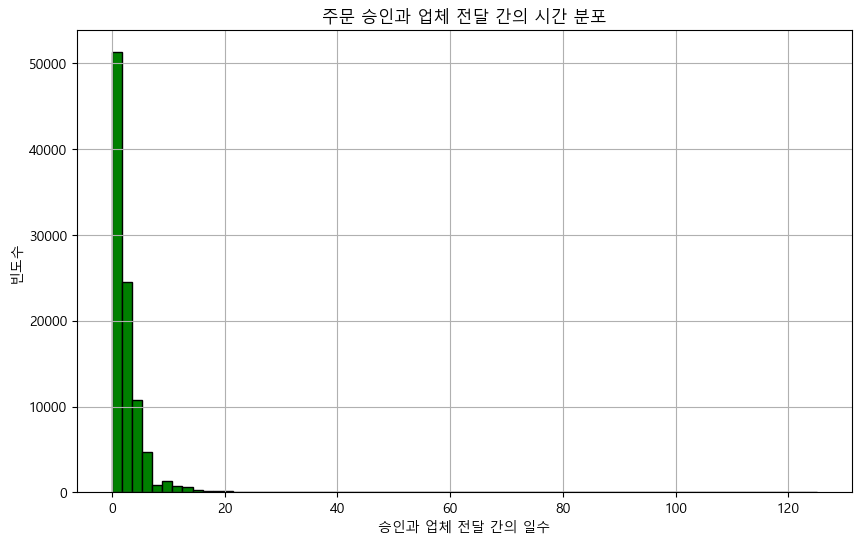

In [28]:
# 그래프 생성
plt.figure(figsize=(10,6))
plt.hist(df_orders['time_difference'].dt.days, bins=70, color='green', edgecolor='black')

# 한국어로 제목과 축 라벨 설정
plt.title('주문 승인과 업체 전달 간의 시간 분포')
plt.xlabel('승인과 업체 전달 간의 일수')
plt.ylabel('빈도수')

plt.grid(True)
plt.show()

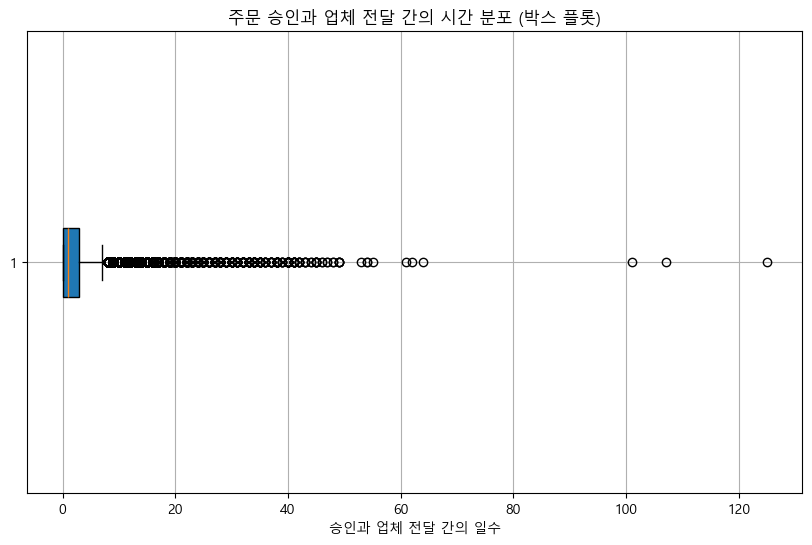

In [29]:
plt.figure(figsize=(10,6))
plt.boxplot(df_orders['time_difference'].dt.days, vert=False, patch_artist=True)

# 한국어로 제목과 축 라벨 설정
plt.title('주문 승인과 업체 전달 간의 시간 분포 (박스 플롯)')
plt.xlabel('승인과 업체 전달 간의 일수')

plt.grid(True)
plt.show()

- 75% 구간은 3 days 14:58:38이지만, 박스플롯을 보면 다양하게 분포하고 있다는 것을 알 수 있다.

In [30]:
#100일 이상 걸린 주문만 추출
df_orders['time_difference_days'] = df_orders['time_difference'].dt.days

# 100일 이상 걸린 주문이면 True, 그렇지 않으면 False로 나타내는 over100days 변수 추가
df_orders['over100days'] = df_orders['time_difference_days'] >= 100

# time_difference_days 칼럼 삭제
df_orders.drop(columns=['time_difference_days'], inplace=True)

df_orders[df_orders['over100days']==True]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,order_weekday,order_hour,time_difference_0,time_difference,over100days
3077,8b7fd198ad184563c231653673e75a7f,3eddc75fe2314996f68ddcd89ddb5caf,delivered,2017-11-14 10:04:27,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,2017-11-28 00:00:00,2017-11,Tuesday,10,2 days 22:42:33,101 days 08:40:15,True
35213,97f48024fcc76f1898e397ad6966e3a0,66d376416dfbdcb87ddc1f2384d343ba,delivered,2017-11-29 12:25:00,2017-11-29 12:41:24,2018-03-16 13:58:02,2018-03-16 13:58:10,2017-12-26 00:00:00,2017-11,Wednesday,12,0 days 00:16:24,107 days 01:16:38,True
36305,da81fbc27b55e0f3d2813cf2078dc780,9cb739dc712ebd193e4eb94f3aeb8d20,delivered,2017-11-14 21:07:55,2017-11-14 21:26:34,2018-03-20 15:44:40,2018-03-21 00:18:54,2017-12-11 00:00:00,2017-11,Tuesday,21,0 days 00:18:39,125 days 18:18:06,True


### 업체전달-고객전달

In [31]:
# 업체 전달 날짜와 고객 전달 날짜의 차이를 계산하기 위해 datetime 형식으로 변환
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'], errors='coerce')

# time_difference_2 컬럼 생성 (업체 전달 날짜와 고객 전달 날짜 간의 차이)
df_orders['time_difference_2'] = df_orders['order_delivered_customer_date']-df_orders['order_delivered_carrier_date']

# 결과 확인
print(df_orders[['order_delivered_carrier_date','order_delivered_customer_date', 'time_difference_2']].head(10))

   order_delivered_carrier_date order_delivered_customer_date  \
0           2017-10-04 19:55:00           2017-10-10 21:25:13   
1           2018-07-26 14:31:00           2018-08-07 15:27:45   
2           2018-08-08 13:50:00           2018-08-17 18:06:29   
3           2017-11-22 13:39:59           2017-12-02 00:28:42   
4           2018-02-14 19:46:34           2018-02-16 18:17:02   
5           2017-07-11 14:58:04           2017-07-26 10:57:55   
7           2017-05-22 10:07:46           2017-05-26 12:55:51   
8           2017-01-26 14:16:31           2017-02-02 14:08:10   
9           2017-08-10 19:45:24           2017-08-16 17:14:30   
10          2017-05-18 11:40:40           2017-05-29 11:18:31   

   time_difference_2  
0    6 days 01:30:13  
1   12 days 00:56:45  
2    9 days 04:16:29  
3    9 days 10:48:43  
4    1 days 22:30:28  
5   14 days 19:59:51  
7    4 days 02:48:05  
8    6 days 23:51:39  
9    5 days 21:29:06  
10  10 days 23:37:51  


In [32]:
# 결측치 확인
df_orders[df_orders['time_difference_2'].isnull()]

# NaT 결측치 제거
df_orders = df_orders[df_orders['time_difference'].notna()]

In [33]:
df_orders['time_difference_2'].describe()

count                        95111
mean     9 days 08:40:16.978488292
std      8 days 18:30:09.312341999
min             -17 days +21:41:31
25%         4 days 02:37:49.500000
50%                7 days 02:37:42
75%               12 days 01:22:03
max              205 days 04:35:00
Name: time_difference_2, dtype: object

- 여기도 음수값 존재하므로 음수값 제거 후 통계값 재산출

In [34]:
# time_difference가 음수인 행 제거
df_orders = df_orders[df_orders['time_difference_2'] >= pd.Timedelta(0)]

df_orders['time_difference_2'].describe()

count                        95088
mean     9 days 08:44:40.932672892
std      8 days 18:28:15.078206221
min                0 days 00:00:00
25%                4 days 02:39:52
50%                7 days 02:38:52
75%        12 days 01:23:29.750000
max              205 days 04:35:00
Name: time_difference_2, dtype: object

In [35]:
# time_difference_2 값을 작은 것부터 순차적으로 정렬하여 출력
sorted_time_difference_2 = df_orders.sort_values(by='time_difference_2')

# 결과 확인
print(sorted_time_difference_2[['order_delivered_carrier_date','order_delivered_customer_date', 'time_difference_2']].head(20))

      order_delivered_carrier_date order_delivered_customer_date  \
3706           2017-08-09 18:18:28           2017-08-09 18:18:28   
75351          2017-08-29 09:13:53           2017-08-29 09:13:53   
97891          2016-10-14 11:03:10           2016-10-14 11:03:10   
50153          2017-07-20 14:54:59           2017-07-20 14:54:59   
18600          2017-02-03 10:50:28           2017-02-03 10:50:28   
4825           2018-03-27 00:08:32           2018-03-27 00:08:32   
86460          2017-02-01 18:06:52           2017-02-01 18:06:52   
84425          2017-08-09 20:50:10           2017-08-09 20:50:10   
39621          2017-02-01 18:06:23           2017-02-01 18:06:23   
98594          2017-09-06 16:04:46           2017-09-06 16:04:47   
31866          2017-08-22 11:34:02           2017-08-22 11:34:03   
60999          2018-03-19 10:11:44           2018-03-19 10:11:48   
4036           2018-04-09 15:13:03           2018-04-09 15:13:08   
11358          2018-03-12 15:14:14           201

In [36]:
# time_difference_2가 10분 이하인 데이터를 추출하는 코드
zero_days_or_less = df_orders[df_orders['time_difference_2'] <= pd.Timedelta(minutes=1)]
print(zero_days_or_less[['order_delivered_carrier_date', 'order_delivered_customer_date','time_difference_2']])
zero_days_or_less.shape[0]

      order_delivered_carrier_date order_delivered_customer_date  \
3706           2017-08-09 18:18:28           2017-08-09 18:18:28   
4036           2018-04-09 15:13:03           2018-04-09 15:13:08   
4825           2018-03-27 00:08:32           2018-03-27 00:08:32   
11358          2018-03-12 15:14:14           2018-03-12 15:14:20   
18600          2017-02-03 10:50:28           2017-02-03 10:50:28   
31866          2017-08-22 11:34:02           2017-08-22 11:34:03   
35213          2018-03-16 13:58:02           2018-03-16 13:58:10   
39621          2017-02-01 18:06:23           2017-02-01 18:06:23   
50153          2017-07-20 14:54:59           2017-07-20 14:54:59   
60999          2018-03-19 10:11:44           2018-03-19 10:11:48   
75351          2017-08-29 09:13:53           2017-08-29 09:13:53   
84425          2017-08-09 20:50:10           2017-08-09 20:50:10   
86460          2017-02-01 18:06:52           2017-02-01 18:06:52   
97891          2016-10-14 11:03:10           201

15

In [37]:
#(업체 전달 날짜-고객 전달 날짜) 차이가 1분 미만인 행 삭제 후 통계값 산출
td2_no_zero = df_orders[df_orders['time_difference_2'] > pd.Timedelta(minutes=1)]
td2_no_zero['time_difference_2'].describe()

count                        95073
mean     9 days 08:46:48.583940761
std      8 days 18:28:06.685359274
min                0 days 00:22:56
25%                4 days 02:41:46
50%                7 days 02:39:12
75%               12 days 01:24:24
max              205 days 04:35:00
Name: time_difference_2, dtype: object

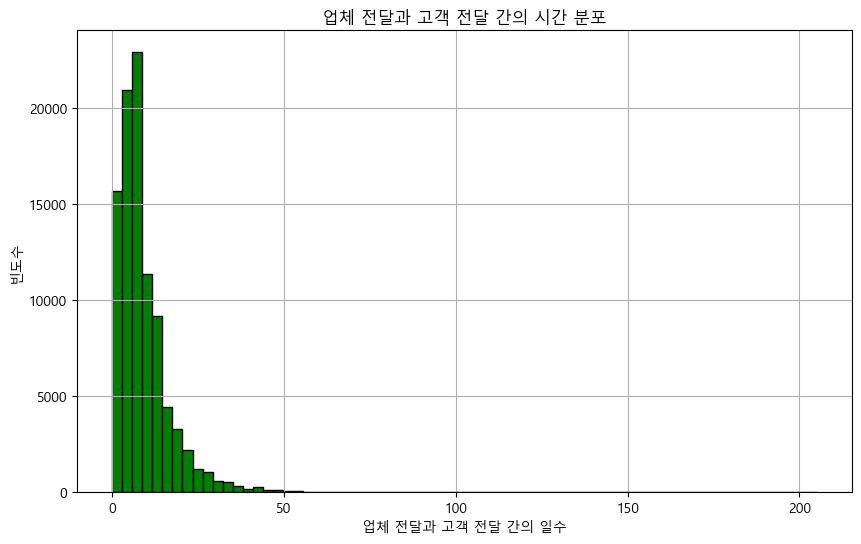

In [38]:
# 그래프 생성
plt.figure(figsize=(10,6))
plt.hist(td2_no_zero['time_difference_2'].dt.days, bins=70, color='green', edgecolor='black')

# 한국어로 제목과 축 라벨 설정
plt.title('업체 전달과 고객 전달 간의 시간 분포')
plt.xlabel('업체 전달과 고객 전달 간의 일수')
plt.ylabel('빈도수')

plt.grid(True)
plt.show()

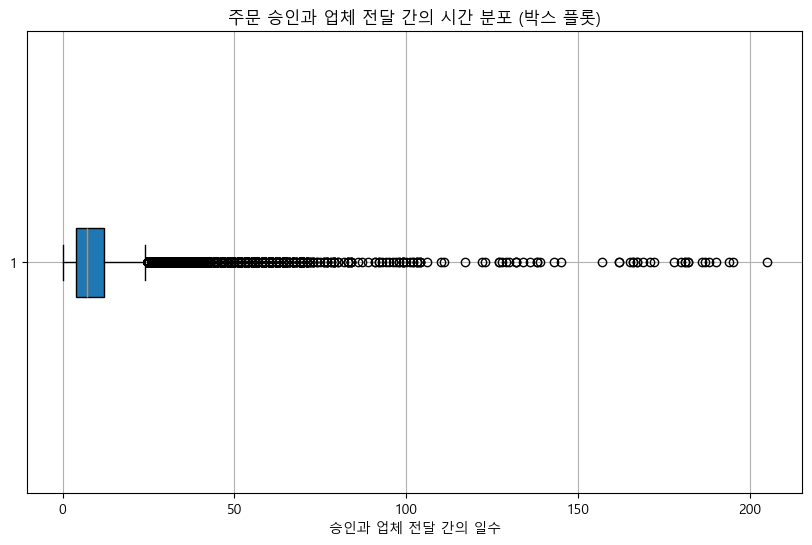

In [39]:
plt.figure(figsize=(10,6))
plt.boxplot(td2_no_zero['time_difference_2'].dt.days, vert=False, patch_artist=True)

# 한국어로 제목과 축 라벨 설정
plt.title('주문 승인과 업체 전달 간의 시간 분포 (박스 플롯)')
plt.xlabel('승인과 업체 전달 간의 일수')

plt.grid(True)
plt.show()

### 주별 주문 처리 시간

In [40]:
#데이터셋 불러오기
df_customers = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_customers_dataset.csv')

# 'customer_id'를 기준으로 두 데이터셋 병합
df_cusorder= pd.merge(df_orders, df_customers, on='customer_id', how='inner')

# 병합된 데이터셋의 상위 몇 개 행 보기
df_cusorder.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_month,order_weekday,order_hour,time_difference_0,time_difference,over100days,time_difference_2,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,Monday,10,0 days 00:10:42,2 days 08:47:45,False,6 days 01:30:13,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,Tuesday,20,1 days 06:42:50,0 days 11:06:33,False,12 days 00:56:45,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,Wednesday,8,0 days 00:16:34,0 days 04:54:37,False,9 days 04:16:29,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,Saturday,19,0 days 00:17:53,3 days 17:54:00,False,9 days 10:48:43,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,Tuesday,21,0 days 01:01:50,0 days 21:26:05,False,1 days 22:30:28,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [41]:
df_cusorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95088 entries, 0 to 95087
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       95088 non-null  object         
 1   customer_id                    95088 non-null  object         
 2   order_status                   95088 non-null  object         
 3   order_purchase_timestamp       95088 non-null  datetime64[ns] 
 4   order_approved_at              95088 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   95088 non-null  datetime64[ns] 
 6   order_delivered_customer_date  95088 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  95088 non-null  object         
 8   order_month                    95088 non-null  period[M]      
 9   order_weekday                  95088 non-null  object         
 10  order_hour                     95088 non-null  int32          
 11  ti

In [42]:
df_cusorder.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_month                      0
order_weekday                    0
order_hour                       0
time_difference_0                0
time_difference                  0
over100days                      0
time_difference_2                0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

   customer_state           time_difference
21             RR    3 days 10:22:52.150000
19             RN 3 days 04:28:12.511777301
24             SE 3 days 04:08:54.708708708
9              MA 3 days 01:59:40.583806818
13             PA 3 days 00:35:26.284188034
1              AL 3 days 00:23:09.872773536
7              ES 2 days 23:51:25.279979674
14             PB 2 days 23:30:29.239685658
0              AC 2 days 23:24:41.831168831
18             RJ 2 days 23:05:25.368132318
5              CE 2 days 22:10:42.676727561
23             SC 2 days 21:52:46.703120526
26             TO 2 days 21:51:14.248148148
15             PE 2 days 21:13:33.952320406
3              AP 2 days 21:10:09.701492537
10             MG 2 days 20:53:32.557700902
4              BA 2 days 20:51:21.986604361
17             PR 2 days 19:35:26.317430813
25             SP 2 days 19:27:12.174047064
6              DF 2 days 19:17:29.638902498
16             PI 2 days 19:14:45.985074626
22             RS 2 days 18:51:1

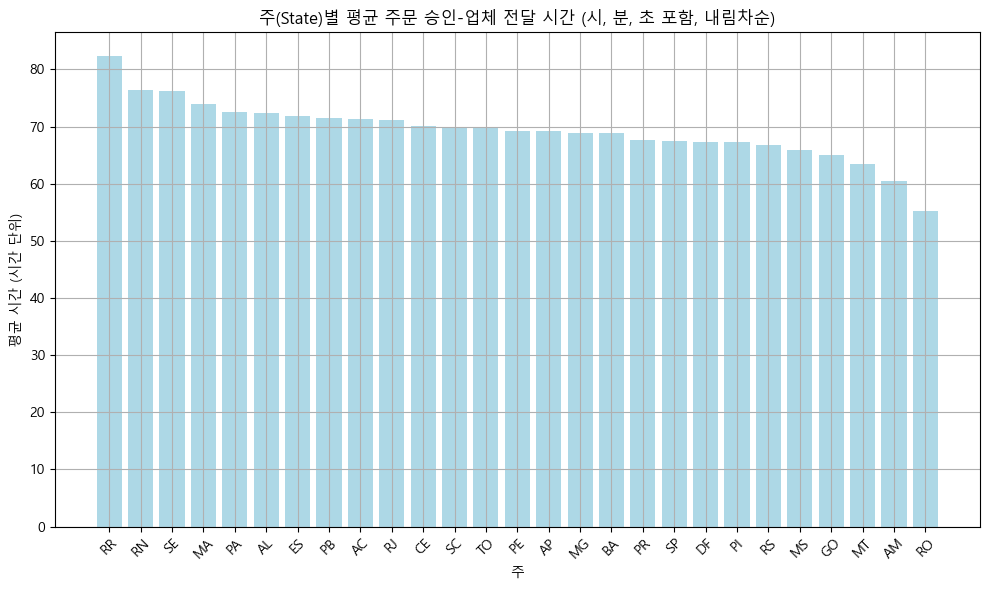

In [43]:
# 주(State)별로 주문 승인과 업체 전달 간의 시간 차이 계산 (평균 timedelta)
state_time_analysis = df_cusorder.groupby('customer_state')['time_difference'].mean().reset_index()

# 시간 차이를 기준으로 내림차순 정렬
state_time_analysis = state_time_analysis.sort_values(by='time_difference', ascending=False)

# 결과 출력
print(state_time_analysis)

# 막대그래프로 시각화 (시간을 시간 단위로 표시)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(state_time_analysis['customer_state'], state_time_analysis['time_difference'].dt.total_seconds() / 3600, color='lightblue')

# 한국어로 제목과 축 라벨 설정 (시간을 시간 단위로 표시)
plt.title('주(State)별 평균 주문 승인-업체 전달 시간 (시, 분, 초 포함, 내림차순)')
plt.xlabel('주')
plt.ylabel('평균 시간 (시간 단위)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

- (주문 승인 시간 - 업체 전달 시간) 차이 Top 5
1. RR주 /평균 80시간 이상       /브라질 최북부
2. RN주 /평균 76시간 30분 이상  /브라질 북동부 대서양 연안
3. SE주 /평균 76시간 이상       /브라질 북동부 대서양 연안   /인구밀도 89.8 5위
4. MA주 /평균 74시간 이상       /브라질 북동부 대서양 연안   /알루미늄 공업 발달지
5. PA주 /평균 72시간 이상       /브라질 북부                /아마존 열대우림, 두번째로 큰 주, 국경접합지

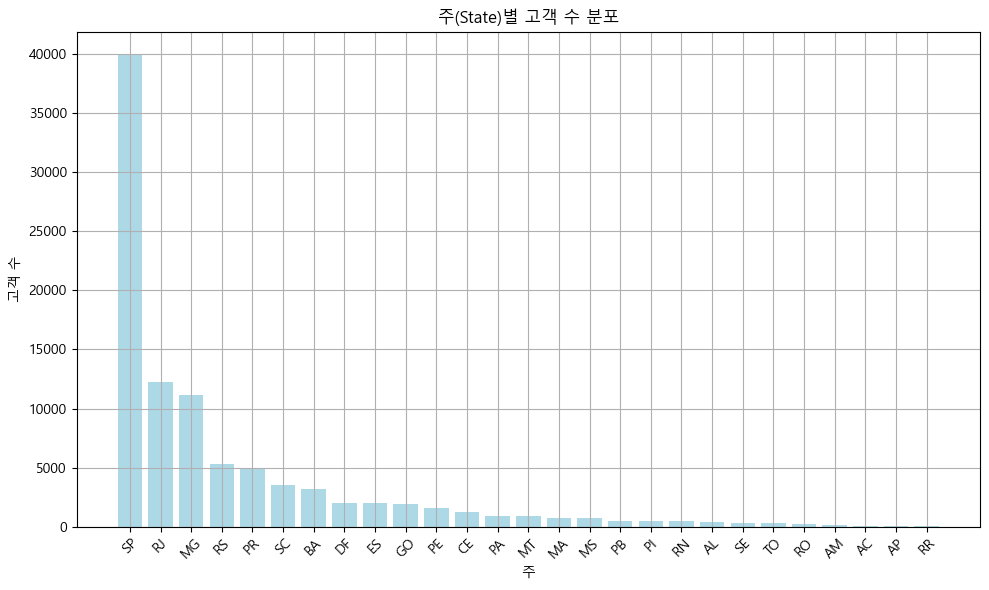

In [44]:
# 고객이 가장 많이 거주하는 주를 찾기 위해 각 주별 고객 수 계산
state_customer_counts = df_cusorder['customer_state'].value_counts().reset_index()

# 컬럼 이름 변경
state_customer_counts.columns = ['customer_state', 'customer_count']

# 고객이 가장 많이 거주하는 주 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(state_customer_counts['customer_state'], state_customer_counts['customer_count'], color='lightblue')

# 한국어로 제목과 축 라벨 설정
plt.title('주(State)별 고객 수 분포')
plt.xlabel('주')
plt.ylabel('고객 수')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

   customer_state          time_difference_2
21             RR    26 days 00:36:33.325000
3              AP 23 days 15:55:28.447761194
2              AM 23 days 12:12:44.763888889
1              AL 20 days 21:36:30.361323155
13             PA 20 days 07:14:13.507478632
9              MA 18 days 00:52:47.884943181
5              CE 18 days 00:41:06.285146942
24             SE 17 days 23:57:32.714714714
0              AC 17 days 14:41:45.597402597
14             PB 16 days 23:51:53.143418467
20             RO 16 days 13:23:05.900826446
16             PI 16 days 08:50:18.791044776
4              BA 16 days 01:21:25.980685358
19             RN 15 days 16:34:26.355460385
15             PE 15 days 05:15:26.904640813
12             MT 14 days 23:38:50.843857635
26             TO    14 days 08:17:33.100000
11             MS 12 days 11:31:28.919540229
8              GO 12 days 11:15:34.893805309
7              ES 12 days 10:23:40.673272357
22             RS 12 days 03:12:45.522813688
18        

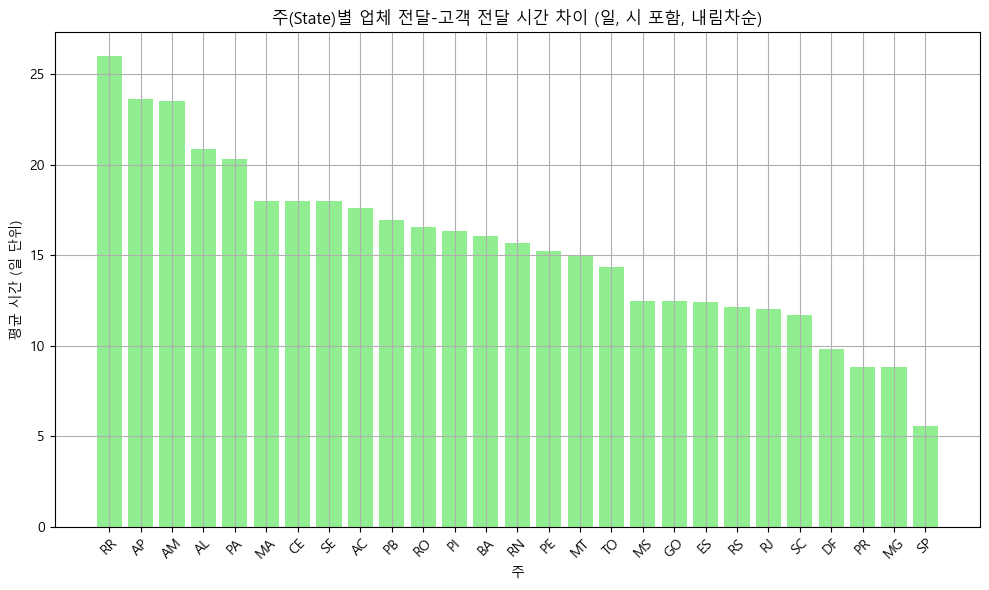

In [45]:
# 주(State)별로 time_difference_2 (업체 전달-고객 전달 시간 차이) 분석

# 주별로 평균 차이 계산
state_carrier_to_customer_analysis = df_cusorder.groupby('customer_state')['time_difference_2'].mean().reset_index()

# 시간 차이를 기준으로 내림차순 정렬
state_carrier_to_customer_analysis = state_carrier_to_customer_analysis.sort_values(by='time_difference_2', ascending=False)

print(state_carrier_to_customer_analysis)

# 시간 차이를 '일'과 '시간' 단위로 변환
state_carrier_to_customer_analysis['days'] = state_carrier_to_customer_analysis['time_difference_2'].dt.days
state_carrier_to_customer_analysis['hours'] = state_carrier_to_customer_analysis['time_difference_2'].dt.seconds // 3600

# 막대그래프로 시각화 (일, 시까지만 포함)
import matplotlib.pyplot as plt

# '일'과 '시간'을 결합한 문자열로 라벨 생성
state_carrier_to_customer_analysis['days_hours'] = state_carrier_to_customer_analysis['days'].astype(str) + '일 ' + state_carrier_to_customer_analysis['hours'].astype(str) + '시간'

plt.figure(figsize=(10, 6))
plt.bar(state_carrier_to_customer_analysis['customer_state'], state_carrier_to_customer_analysis['days'] + state_carrier_to_customer_analysis['hours'] / 24, color='lightgreen')

# 한국어로 제목과 축 라벨 설정
plt.title('주(State)별 업체 전달-고객 전달 시간 차이 (일, 시 포함, 내림차순)')
plt.xlabel('주')
plt.ylabel('평균 시간 (일 단위)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


- (업체 전달 시간 - 고객 전달 시간) 차이 Top 5
1. RR주 /평균 26일 이상         /브라질 최북부
2. AP주 /평균 23일 15시간 이상  /브라질 북부, 국경접합지, 대서양 연안
3. AM주 /평균 23일 12시간 이상  /브라질 북부, 국경접합지, 가장 넓은 주, 아마존 우림(인구밀도 뒤에서 2위)
4. AL주 /평균 20일 21시간 이상  /브라질 북동부, 대서양연안, 인구밀도 108.6 4위
5. PA주 /평균 20일 7시간 이상   /브라질 북부, 국경접합지, 두번째로 큰 주, 아마존 열대우림, time_difference_0 5위  

   customer_state approval_to_delivery_time_difference
21             RR              29 days 10:59:25.475000
3              AP           26 days 13:05:38.149253731
2              AM           26 days 00:38:21.465277777
1              AL           23 days 21:59:40.234096692
13             PA           23 days 07:49:39.791666666
24             SE           21 days 04:06:27.423423423
9              MA              21 days 02:52:28.468750
5              CE           20 days 22:51:48.961874503
0              AC           20 days 14:06:27.428571428
14             PB           19 days 23:22:22.383104125
16             PI           19 days 04:05:04.776119403
4              BA           18 days 22:12:47.967289719
19             RN           18 days 21:02:38.867237687
20             RO           18 days 20:38:00.111570248
15             PE           18 days 02:29:00.856961220
12             MT           17 days 15:10:36.483352468
26             TO           17 days 06:08:47.348148148
7         

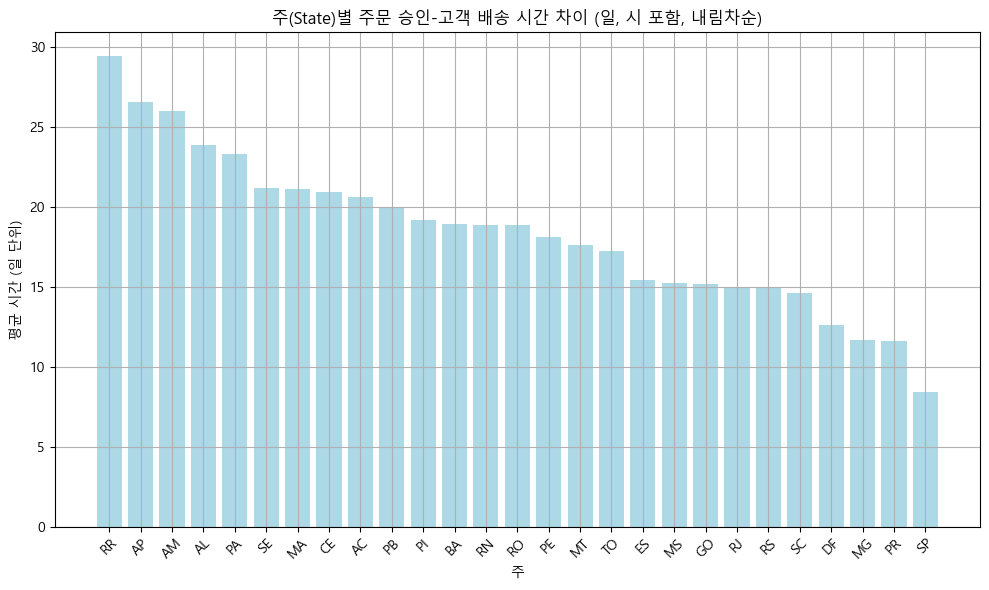

In [46]:
# 'order_approved_at'과 'order_delivered_customer_date'를 datetime 형식으로 변환
df_cusorder['order_approved_at'] = pd.to_datetime(df_cusorder['order_approved_at'], errors='coerce')
df_cusorder['order_delivered_customer_date'] = pd.to_datetime(df_cusorder['order_delivered_customer_date'], errors='coerce')

# 주문 승인 시간과 고객에게 배송된 시간의 차이 계산
df_cusorder['approval_to_delivery_time_difference'] = df_cusorder['order_delivered_customer_date'] - df_cusorder['order_approved_at']

# 주(State)별로 평균 차이 계산
state_approval_to_delivery_analysis = df_cusorder.groupby('customer_state')['approval_to_delivery_time_difference'].mean().reset_index()

# 시간 차이를 기준으로 내림차순 정렬
state_approval_to_delivery_analysis = state_approval_to_delivery_analysis.sort_values(by='approval_to_delivery_time_difference', ascending=False)
print(state_approval_to_delivery_analysis)

# 시간 차이를 '일'과 '시간' 단위로 변환
state_approval_to_delivery_analysis['days'] = state_approval_to_delivery_analysis['approval_to_delivery_time_difference'].dt.days
state_approval_to_delivery_analysis['hours'] = state_approval_to_delivery_analysis['approval_to_delivery_time_difference'].dt.seconds // 3600

# 막대그래프로 시각화 (일, 시까지만 포함)
import matplotlib.pyplot as plt

# '일'과 '시간'을 결합한 문자열로 라벨 생성
state_approval_to_delivery_analysis['days_hours'] = state_approval_to_delivery_analysis['days'].astype(str) + '일 ' + state_approval_to_delivery_analysis['hours'].astype(str) + '시간'

plt.figure(figsize=(10, 6))
plt.bar(state_approval_to_delivery_analysis['customer_state'], state_approval_to_delivery_analysis['days'] + state_approval_to_delivery_analysis['hours'] / 24, color='lightblue')

# 한국어로 제목과 축 라벨 설정
plt.title('주(State)별 주문 승인-고객 배송 시간 차이 (일, 시 포함, 내림차순)')
plt.xlabel('주')
plt.ylabel('평균 시간 (일 단위)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

- (고객 전달 시간 - 주문 승인 시간)의 순위는 (업체 전달 시간 - 고객 전달 시간)과 동일

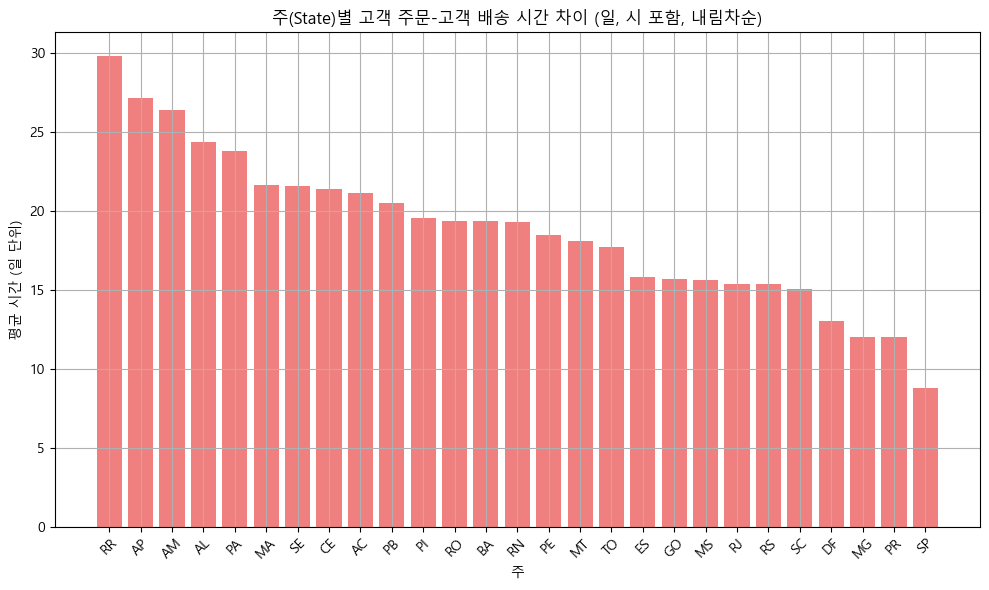

In [47]:
# 'order_purchase_timestamp'과 'order_delivered_customer_date'를 datetime 형식으로 변환
df_cusorder['order_purchase_timestamp'] = pd.to_datetime(df_cusorder['order_purchase_timestamp'], errors='coerce')
df_cusorder['order_delivered_customer_date'] = pd.to_datetime(df_cusorder['order_delivered_customer_date'], errors='coerce')

# 고객 주문 시간과 고객에게 배송된 시간의 차이 계산
df_cusorder['purchase_to_delivery_time_difference'] = df_cusorder['order_delivered_customer_date'] - df_cusorder['order_purchase_timestamp']

# 주(State)별로 평균 차이 계산
state_purchase_to_delivery_analysis = df_cusorder.groupby('customer_state')['purchase_to_delivery_time_difference'].mean().reset_index()

# 시간 차이를 기준으로 내림차순 정렬
state_purchase_to_delivery_analysis = state_purchase_to_delivery_analysis.sort_values(by='purchase_to_delivery_time_difference', ascending=False)

# 시간 차이를 '일'과 '시간' 단위로 변환
state_purchase_to_delivery_analysis['days'] = state_purchase_to_delivery_analysis['purchase_to_delivery_time_difference'].dt.days
state_purchase_to_delivery_analysis['hours'] = state_purchase_to_delivery_analysis['purchase_to_delivery_time_difference'].dt.seconds // 3600

# 막대그래프로 시각화 (일, 시까지만 포함)
import matplotlib.pyplot as plt

# '일'과 '시간'을 결합한 문자열로 라벨 생성
state_purchase_to_delivery_analysis['days_hours'] = state_purchase_to_delivery_analysis['days'].astype(str) + '일 ' + state_purchase_to_delivery_analysis['hours'].astype(str) + '시간'

plt.figure(figsize=(10, 6))
plt.bar(state_purchase_to_delivery_analysis['customer_state'], state_purchase_to_delivery_analysis['days'] + state_purchase_to_delivery_analysis['hours'] / 24, color='lightcoral')

# 한국어로 제목과 축 라벨 설정
plt.title('주(State)별 고객 주문-고객 배송 시간 차이 (일, 시 포함, 내림차순)')
plt.xlabel('주')
plt.ylabel('평균 시간 (일 단위)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

- (고객 전달 시간  고객 주문 시간)의 순위는 (업체 전달 시간 - 주문 승인 시간), (고객 전달 시간 - 업체 전달 시간) 순위와 동일.
- 총 소요 시간에 고객이 주문 후 얼마나 빨리 주문을 승인하는지는 영향을 주지 않음

In [48]:
# 주별로 필요한 분석을 담은 새로운 데이터프레임 생성

# 고객 수 계산
state_customer_count = df_cusorder.groupby('customer_state')['customer_id'].nunique().reset_index()
state_customer_count.columns = ['customer_state', 'customer_count']

# 주별 고객 주문 시간과 고객 전달 시간의 차이 (일 단위로 계산)
state_purchase_to_delivery = df_cusorder.groupby('customer_state')['purchase_to_delivery_time_difference'].mean().reset_index()
state_purchase_to_delivery['days'] = state_purchase_to_delivery['purchase_to_delivery_time_difference'].dt.days
state_purchase_to_delivery = state_purchase_to_delivery[['customer_state', 'days']]
state_purchase_to_delivery.columns = ['customer_state', 'purchase_to_delivery_days']

# 주문 승인 시간과 업체 전달 시간의 차이 (일 단위로 계산)
state_approval_to_carrier = df_cusorder.groupby('customer_state')['time_difference'].mean().reset_index()
state_approval_to_carrier['days'] = state_approval_to_carrier['time_difference'].dt.days
state_approval_to_carrier = state_approval_to_carrier[['customer_state', 'days']]
state_approval_to_carrier.columns = ['customer_state', 'approval_to_carrier_days']

# 업체 전달 시간과 고객 전달 시간의 차이 (일 단위로 계산)
state_carrier_to_customer = df_cusorder.groupby('customer_state')['time_difference_2'].mean().reset_index()
state_carrier_to_customer['days'] = state_carrier_to_customer['time_difference_2'].dt.days
state_carrier_to_customer = state_carrier_to_customer[['customer_state', 'days']]
state_carrier_to_customer.columns = ['customer_state', 'carrier_to_customer_days']

# 데이터프레임 병합
final_df = state_customer_count.merge(state_purchase_to_delivery, on='customer_state')
final_df = final_df.merge(state_approval_to_carrier, on='customer_state')
final_df = final_df.merge(state_carrier_to_customer, on='customer_state')

# 'purchase_to_delivery_days' 기준으로 내림차순 정렬하고 상위 10개 추출
final_df.sort_values(by='purchase_to_delivery_days', ascending=False).head(10)


,customer_state,customer_count,purchase_to_delivery_days,approval_to_carrier_days,carrier_to_customer_days
21,RR,40,29,3,26
3,AP,67,27,2,23
2,AM,144,26,2,23
1,AL,393,24,3,20
13,PA,936,23,3,20
0,AC,77,21,2,17
5,CE,1259,21,2,18
9,MA,704,21,3,18
24,SE,333,21,3,17
14,PB,509,20,2,16


# 배송 불만족 비율

In [49]:
df_reviews = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_order_reviews_dataset.csv')
df_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


- 배송 불만족 관련 키워드(포르투갈어)  
"Atrasado": 지연된
"Entrega atrasada": 배송 지연
"Demorou": 오래 걸렸다
"Demora na entrega": 배송이 늦었다
"Demorado": 지연된
"Atraso na entrega": 배송 지연  
"Problema com a entrega": 배송 문제
"Entrega errada": 잘못된 배송
"Pedido não chegou": 주문이 도착하지 않았다
"Entrega incompleta": 불완전한 배송  
"Produto não chegou": 제품이 도착하지 않았다
"Chegou danificado": 손상된 상태로 도착했다
"Chegou tarde": 늦게 도착했다
"Muito demorado": 매우 지연되었다
"Entrega muito lenta": 배송이 매우 느렸다
"Chegada atrasada": 늦은 도착

In [50]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re

# 자연어 처리에 필요한 데이터 전처리 및 불만족 리뷰 감정 분석을 위한 기본 함수
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# 텍스트 전처리 함수
def preprocess_review(text):
    # 텍스트 소문자 변환, 특수 문자 제거
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    # 불용어 제거
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

# 주어진 키워드로 불만족 리뷰 분류
negative_keywords = [
    "atrasado", "entrega atrasada", "demorou", "demora na entrega", 
    "demorado", "atraso na entrega", "problema com a entrega", 
    "entrega errada", "pedido não chegou", "entrega incompleta", 
    "produto não chegou", "chegou danificado", "chegou tarde", 
    "muito demorado", "entrega muito lenta", "chegada atrasada"
]

# 새로운 기준 단어를 기반으로 불만족 리뷰 분류
def classify_delivery_review(text):
    for word in negative_keywords:
        if word in text:
            return 1  # 배송 불만족 리뷰
    return 0  # 긍정 리뷰 또는 다른 문제의 리뷰

# 데이터프레임을 df_customers, df_reviews, df_orders로 로드
df_reviews = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_orders_dataset.csv')
df_customers = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_customers_dataset.csv')

# 리뷰 데이터 전처리
df_reviews['processed_review_message'] = df_reviews['review_comment_message'].apply(preprocess_review)

# 불만족 리뷰 여부를 결정
df_reviews['is_negative_delivery'] = df_reviews['processed_review_message'].apply(classify_delivery_review)

# 리뷰와 고객 데이터를 주문 ID를 기준으로 병합
merged_df = pd.merge(df_reviews[['order_id', 'is_negative_delivery']], df_orders[['order_id', 'customer_id']], on='order_id')
merged_df = pd.merge(merged_df, df_customers[['customer_id', 'customer_state']], on='customer_id')

# 각 주별 배송 불만족 리뷰 비율 계산
state_negative_delivery_reviews = merged_df.groupby('customer_state')['is_negative_delivery'].mean().reset_index()

# 주별로 배송 불만족 리뷰 비율을 내림차순으로 정렬
state_negative_delivery_reviews_sorted = state_negative_delivery_reviews.sort_values(by='is_negative_delivery', ascending=False)
state_negative_delivery_reviews_sorted 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pro_1030\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,customer_state,is_negative_delivery
21,RR,0.043478
3,AP,0.029851
0,AC,0.024691
1,AL,0.016908
20,RO,0.011905
24,SE,0.011461
4,BA,0.009532
8,GO,0.008893
19,RN,0.008299
23,SC,0.008004


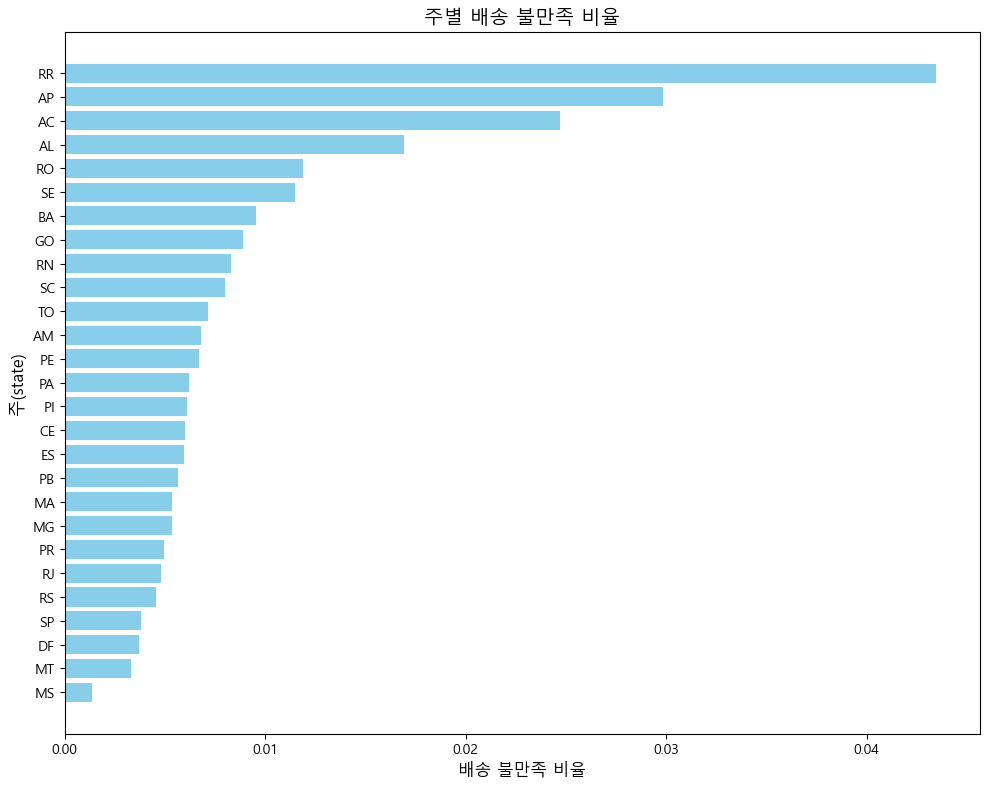

In [51]:
# 결과 시각화
plt.figure(figsize=(10, 8))
plt.barh(state_negative_delivery_reviews_sorted['customer_state'], state_negative_delivery_reviews_sorted['is_negative_delivery'], color='skyblue')
plt.xlabel('배송 불만족 비율', fontsize=12)
plt.ylabel('주(state)', fontsize=12)
plt.title('주별 배송 불만족 비율', fontsize=14)
plt.gca().invert_yaxis()  # 내림차순 정렬을 위한 축 반전
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [52]:
# 불만족 리뷰로 지정된 리뷰들의 리뷰 제목과 내용 상위 10개 출력
negative_reviews = df_reviews[df_reviews['is_negative_delivery'] == 1]

# 상위 10개 리뷰의 제목과 내용 출력
negative_reviews_top10 = negative_reviews[['review_comment_title', 'review_comment_message']].head(10)

# 불만족 리뷰의 주 칼럼도 포함하여 상위 10개 출력
negative_reviews_top10_with_state = negative_reviews[['review_comment_title', 'review_comment_message']].head(10)

# 주(state)와 병합하기 위해 orders 데이터와 결합
negative_reviews_merged = pd.merge(negative_reviews[['order_id', 'review_comment_title', 'review_comment_message']], 
                                   df_orders[['order_id', 'customer_id']], on='order_id')

negative_reviews_merged = pd.merge(negative_reviews_merged, df_customers[['customer_id', 'customer_state']], on='customer_id')

# 상위 10개 리뷰의 제목, 내용, 주 칼럼 표시
negative_reviews_merged[['review_comment_title', 'review_comment_message', 'customer_state']].head(10)

,review_comment_title,review_comment_message,customer_state
0,NaN,Demorou de mais pra entrega,PR
1,NaN,Comprei o produto dia 25 de fevereiro e hoje d...,MT
2,NaN,parabéns para loja e revendedor apesar de ter ...,PE
3,NaN,A loja postou o produto de e mediato o correi...,SP
4,NaN,"Atenciosos,ligam para dar acompanhamento. Bom ...",BA
5,NaN,Recebi a encomenda de forma normal e dentro do...,RJ
6,NaN,Demorou mas entregou!,RJ
7,NaN,o produto demorou um mês para ser entregue . t...,MG
8,NaN,Demorou quase trinta dias .tempo demais,GO
9,NaN,Minha mercadoria era para levar mais ou menos ...,RS


# 주별 주문 상품

In [53]:
df_products = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_products_dataset.csv')
df_category = pd.read_csv('C:\\Users\pro_1030\\Desktop\\Marketing2\\Olist\\product_category_name_translation.csv')

<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\pro_1030\AppData\Local\Temp\ipykernel_1252\861139481.py:2: SyntaxWarning: invalid escape sequence '\p'
  df_category = pd.read_csv('C:\\Users\pro_1030\\Desktop\\Marketing2\\Olist\\product_category_name_translation.csv')


In [54]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [55]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [56]:
# product_category_name 칼럼을 기준으로 병합
merged_df_product= pd.merge(df_products, df_category, on='product_category_name', how='inner')
merged_df_product

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32323,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32324,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32325,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32326,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [57]:
# 필요한 칼럼만 남기고 제거
merged_df_product = merged_df_product[['product_id', 'product_category_name_english', 'product_category_name']]
merged_df_product

,product_id,product_category_name_english,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,art,artes
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,baby,bebes
4,9dc1a7de274444849c219cff195d0b71,housewares,utilidades_domesticas
...,...,...,...
32323,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,moveis_decoracao
32324,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,construcao_ferramentas_iluminacao
32325,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,cama_mesa_banho
32326,83808703fc0706a22e264b9d75f04a2e,computers_accessories,informatica_acessorios


In [58]:
# 한국어 번역 데이터셋 불러오기
category_korean = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\Category_Translation.csv')

# 카테고리를 한국어로 번역한 파일의 칼럼명 변경
category_korean.rename(columns={'Category (English)': 'product_category_name_english'}, inplace=True)

# product_category_name_english를 기준으로 병합
merged_df_product = pd.merge(merged_df_product, category_korean, on='product_category_name_english', how='inner')

# 결과 확인
merged_df_product.head()

,product_id,product_category_name_english,product_category_name,Category (Korean)
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,perfumaria,향수
1,3aa071139cb16b67ca9e5dea641aaa2f,art,artes,예술
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,esporte_lazer,스포츠 및 레저
3,cef67bcfe19066a932b7673e239eb23d,baby,bebes,유아용품
4,9dc1a7de274444849c219cff195d0b71,housewares,utilidades_domesticas,가정용품


In [59]:
merged_df_product['Category (Korean)'].value_counts()

Category (Korean)
침실, 욕실, 테이블      3029
스포츠 및 레저         2867
가구 및 장식          2657
건강 및 미용          2444
가정용품             2335
                 ... 
태블릿, 인쇄 및 이미지       9
아동복                 5
가정 편의 용품 2          5
보안 및 서비스            2
CD, DVD 및 뮤지컬       1
Name: count, Length: 70, dtype: int64

In [60]:
merged_df_product['Category (Korean)'].unique().shape[0] #총 71개의 카테고리 존재
merged_df_product['Category (Korean)'].unique()

array(['향수', '예술', '스포츠 및 레저', '유아용품', '가정용품', '악기', '멋진 물건', '가구 및 장식',
       '가전제품', '장난감', '침실, 욕실, 테이블', '건설 도구 및 안전', '컴퓨터 액세서리', '건강 및 미용',
       '여행용품', '정원 도구', '사무용 가구', '자동차', '전자 제품', '패션 신발', '통신기기', '문구류',
       '패션 가방 및 액세서리', '컴퓨터', '주택 건설', '시계 및 선물', '건설 도구', '애완 동물 용품',
       '소형 가전제품', '농업 및 상업', '거실 가구', '신호 및 보안', '에어컨', '콘솔 및 게임',
       '일반 서적', '속옷 및 해변용품', '남성 의류', '주방, 식사, 세탁, 정원 가구', '산업 및 상업',
       '유선 전화', '건설 도구 및 조명', '기술 서적', '가전제품 2', '파티 용품', '음료', '마켓플레이스',
       '주방용품', '정원용 건설 도구', '여성 의류', '가정 편의 용품', '오디오', '음식 및 음료', '음악',
       '식품', '태블릿, 인쇄 및 이미지', '수입 서적', '소형 가전, 오븐 및 커피머신', '스포츠 패션',
       '크리스마스 용품', '아동복', 'DVD 및 블루레이', '예술 및 공예', '침실 가구', '카메라 및 사진',
       '기저귀 및 위생 용품', '꽃', '가정 편의 용품 2', '보안 및 서비스', '매트리스 및 가구',
       'CD, DVD 및 뮤지컬'], dtype=object)

In [61]:
# 전체 카테고리별 상품의 개수를 확인하는 코드 작성
category_product_count = merged_df_product.groupby('product_category_name_english')['product_id'].count().reset_index()

# 칼럼 이름을 더 이해하기 쉽게 변경
category_product_count.columns = ['product_category_name_english', 'product_count']

# 상품 개수를 내림차순으로 정렬
category_product_count_sorted = category_product_count.sort_values(by='product_count', ascending=False)
category_product_count_sorted

,product_category_name_english,product_count
7,bed_bath_table,3029
65,sports_leisure,2867
39,furniture_decor,2657
43,health_beauty,2444
49,housewares,2335
...,...,...
67,tablets_printing_image,9
46,home_comfort_2,5
29,fashion_childrens_clothes,5
61,security_and_services,2


In [62]:
# items 데이터셋 불러오기
df_items = pd.read_csv('C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_order_items_dataset.csv')
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## 주별 주문 top3 카테고리

In [68]:
# 주문 데이터와 고객 데이터를 병합하여 주별 주문 데이터 생성
merged_order_customer_df = pd.merge(df_orders[['order_id', 'customer_id']], df_customers[['customer_id', 'customer_state']], on='customer_id')

# 주문 아이템 데이터와 병합하여 주별 주문 데이터 생성
order_items_with_state = pd.merge(df_items[['order_id', 'product_id']], merged_order_customer_df, on='order_id')

# product_category_name_english와 Category (Korean)을 기준으로 병합
merged_df_product_with_korean = pd.merge(merged_df_product, category_korean[['product_category_name_english', 'Category (Korean)']], on='product_category_name_english')

# 주문 아이템 데이터와 병합하여 주별 주문 데이터 생성 (Category (Korean) 포함)
order_items_with_category_korean = pd.merge(order_items_with_state, merged_df_product_with_korean[['product_id', 'product_category_name_english', 'Category (Korean)_x']], on='product_id')

# 각 주에서 가장 많이 주문한 카테고리 분석 (한국어 카테고리 포함)
category_per_state_korean = order_items_with_category_korean.groupby(['customer_state', 'product_category_name_english', 'Category (Korean)_x']).size().reset_index(name='order_count')

# 각 주별로 주문이 많은 상위 3개 카테고리 추출 (한국어 카테고리 포함)
top3_ordered_categories_per_state_korean = category_per_state_korean.groupby('customer_state').apply(
    lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)

# 출력되는 데이터 프레임의 모든 행을 볼 수 있도록 설정
pd.set_option('display.max_rows', None)

# 결과 출력
top3_ordered_categories_per_state_korean

C:\Users\pro_1030\AppData\Local\Temp\ipykernel_1252\3554037048.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top3_ordered_categories_per_state_korean = category_per_state_korean.groupby('customer_state').apply(


,customer_state,product_category_name_english,Category (Korean)_x,order_count
0,AC,furniture_decor,가구 및 장식,12
1,AC,computers_accessories,컴퓨터 액세서리,9
2,AC,sports_leisure,스포츠 및 레저,9
3,AL,health_beauty,건강 및 미용,63
4,AL,computers_accessories,컴퓨터 액세서리,41
5,AL,watches_gifts,시계 및 선물,36
6,AM,health_beauty,건강 및 미용,20
7,AM,computers_accessories,컴퓨터 액세서리,17
8,AM,telephony,통신기기,15
9,AP,health_beauty,건강 및 미용,10


- 주별 주문 고객 수 순위 = 주별 주문 수 순위 = make sense하다

In [111]:
# 각 주별 top 3 카테고리 주문 수의 합계를 계산하고 내림차순으로 정렬
top3_orders_sum_per_state = top3_ordered_categories_per_state_korean.groupby('customer_state')['order_count'].sum().reset_index()

# 내림차순으로 정렬
top3_orders_sum_per_state_sorted = top3_orders_sum_per_state.sort_values(by='order_count', ascending=False)
top3_orders_sum_per_state_sorted

,customer_state,order_count
25,SP,13106
18,RJ,3798
10,MG,3417
22,RS,1660
17,PR,1474
23,SC,1047
4,BA,906
6,DF,679
8,GO,631
7,ES,564


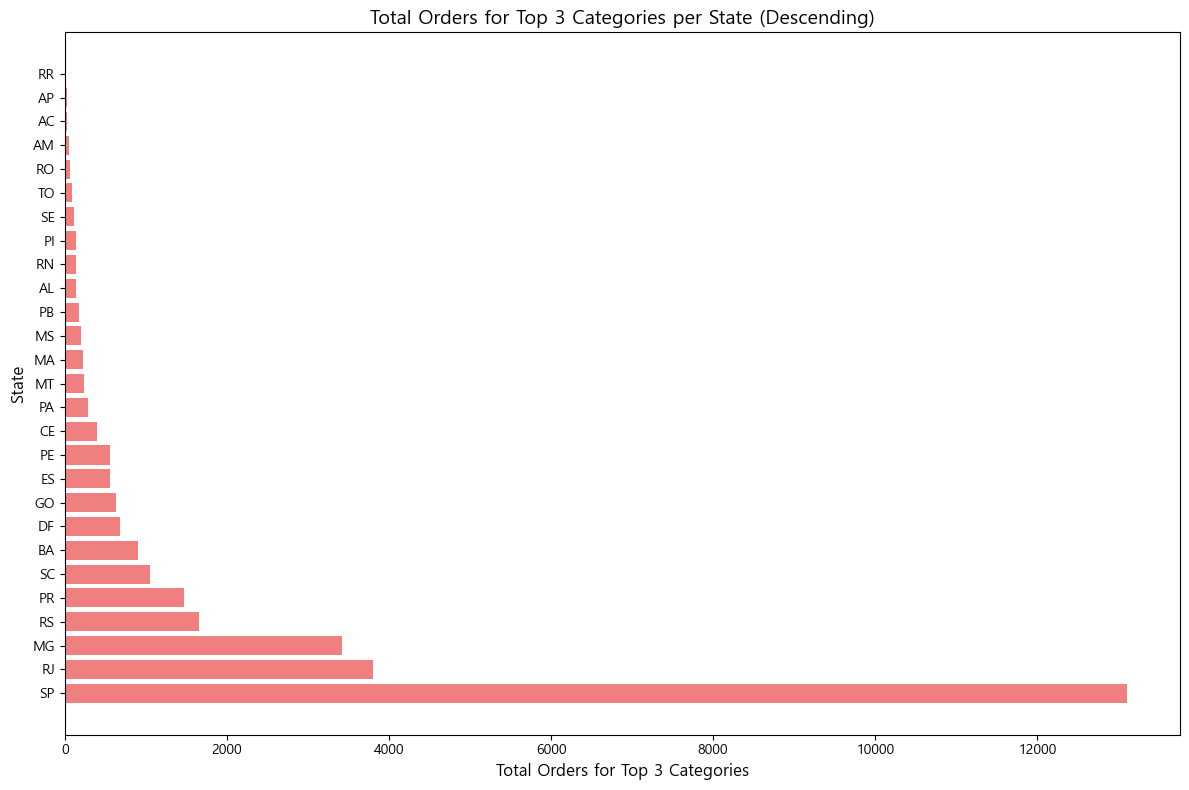

In [87]:
# 주별 top 3 카테고리 주문 수의 합계를 그래프로 시각화
plt.figure(figsize=(12, 8))
plt.barh(top3_orders_sum_per_state_sorted['customer_state'], top3_orders_sum_per_state_sorted['order_count'], color='lightcoral')
plt.xlabel('Total Orders for Top 3 Categories', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.title('Total Orders for Top 3 Categories per State (Descending)', fontsize=14)
plt.tight_layout()

# 그래프 보여주기
plt.show()

## 주별 상품 주문 추세 (시계열분석)

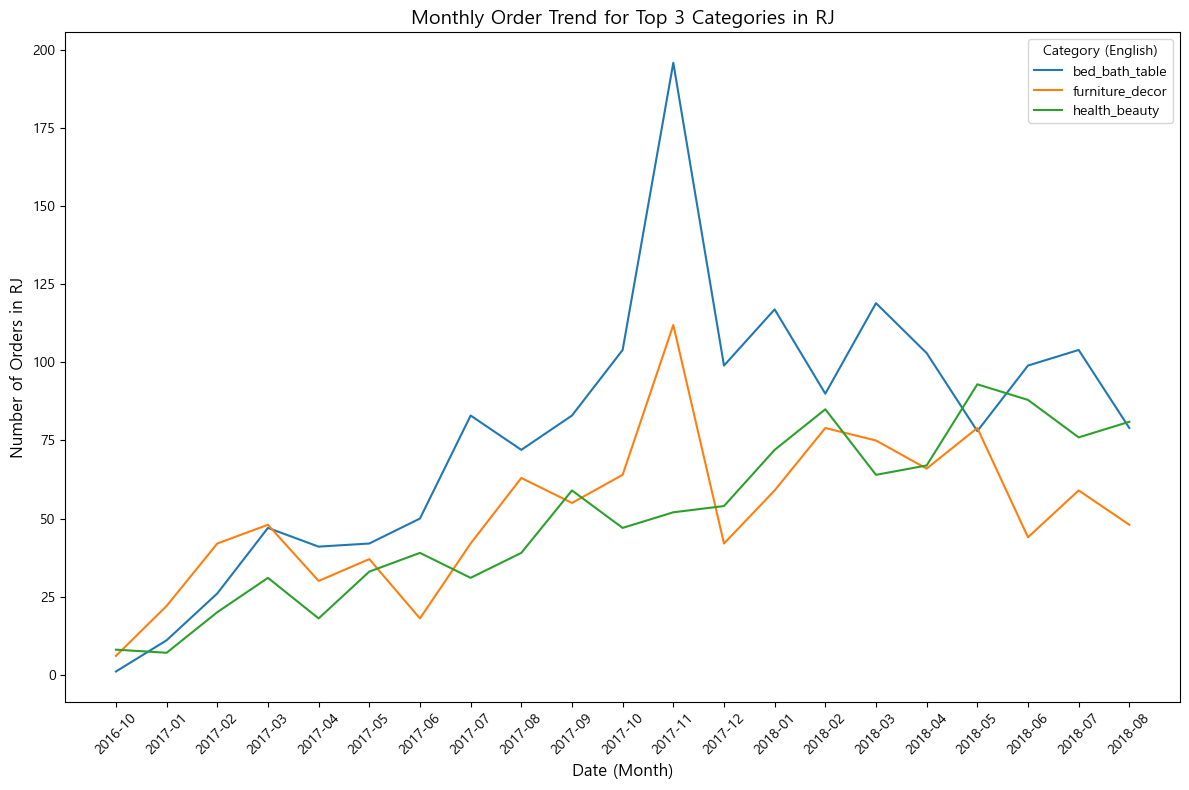

In [125]:
import matplotlib.pyplot as plt

# 주문 날짜를 연월(YYYY-MM) 형식으로 변환
df_orders['order_purchase_date'] = pd.to_datetime(df_orders['order_purchase_timestamp']).dt.to_period('M')

# 주문 아이템 데이터에 주문 날짜 포함
order_items_with_date = pd.merge(order_items_with_category_korean, df_orders[['order_id', 'order_purchase_date']], on='order_id')

# 카테고리별로 주별 주문 수를 집계하여 시계열 분석
category_trend_by_state = order_items_with_date.groupby(['order_purchase_date', 'customer_state', 'product_category_name_english']).size().reset_index(name='order_count')

# 중복된 데이터를 그룹핑하여 합산 (주별 카테고리의 주문 수 합계로 처리)
category_trend_by_state_grouped = category_trend_by_state.groupby(['order_purchase_date', 'customer_state', 'product_category_name_english'])['order_count'].sum().reset_index()

# 주별 상위 3개 카테고리 추출 후 그래프 그리기
def plot_top3_categories_by_state(state_to_plot):
    # 해당 주(state)의 상위 3개 카테고리를 동적으로 추출
    top3_categories = category_trend_by_state_grouped[category_trend_by_state_grouped['customer_state'] == state_to_plot] \
        .groupby('product_category_name_english')['order_count'].sum() \
        .nlargest(3).index
    
    plt.figure(figsize=(12, 8))

    for category in top3_categories:
        subset = category_trend_by_state_grouped[(category_trend_by_state_grouped['product_category_name_english'] == category) &
                                                 (category_trend_by_state_grouped['customer_state'] == state_to_plot)]
        plt.plot(subset['order_purchase_date'].astype(str), subset['order_count'], label=category)

    plt.xlabel('Date (Month)', fontsize=12)
    plt.ylabel(f'Number of Orders in {state_to_plot}', fontsize=12)
    plt.title(f'Monthly Order Trend for Top 3 Categories in {state_to_plot}', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Category (English)')
    plt.tight_layout()

    # 그래프 보여주기
    plt.show()

# 원하는 주(state)를 설정하여 호출 (예: SP, RJ 등)
state_to_plot = 'RJ'  # Rio de Janeiro로 설정
plot_top3_categories_by_state(state_to_plot)

## 주간 평균 주문량

In [130]:
# 주문 날짜를 주 단위로 변환
df_orders['order_purchase_week'] = pd.to_datetime(df_orders['order_purchase_timestamp']).dt.to_period('W')

# 주문 아이템 데이터에 주문 주차 포함
order_items_with_week = pd.merge(order_items_with_category_korean, df_orders[['order_id', 'order_purchase_week']], on='order_id')

# 카테고리별로 주별 주문 수를 집계하여 주간 평균 주문량 분석
category_trend_by_state_weekly = order_items_with_week.groupby(['order_purchase_week', 'customer_state', 'product_category_name_english']).size().reset_index(name='order_count')

# 중복된 데이터를 그룹핑하여 합산 (주별 카테고리의 주문 수 합계로 처리)
category_trend_by_state_grouped_weekly = category_trend_by_state_weekly.groupby(['order_purchase_week', 'customer_state', 'product_category_name_english'])['order_count'].sum().reset_index()

# 주별 상위 3개 카테고리 추출 후 주간 평균 계산
def top3_weekly_avg_orders_by_state():
    result = []

    # 각 주(state)별로 처리
    for state in category_trend_by_state_grouped_weekly['customer_state'].unique():
        # 해당 주의 상위 3개 카테고리 추출
        top3_categories = category_trend_by_state_grouped_weekly[category_trend_by_state_grouped_weekly['customer_state'] == state] \
            .groupby('product_category_name_english')['order_count'].sum() \
            .nlargest(3).index
        
        # 상위 3개 카테고리에 대한 주간 평균 주문량 계산
        for category in top3_categories:
            weekly_avg = category_trend_by_state_grouped_weekly[
                (category_trend_by_state_grouped_weekly['customer_state'] == state) &
                (category_trend_by_state_grouped_weekly['product_category_name_english'] == category)
            ]['order_count'].mean()

            result.append({'State': state, 'Category': category, 'Weekly_Avg_Orders': weekly_avg})

    # 결과를 데이터프레임으로 변환
    result_df = pd.DataFrame(result)

    # 주별로 상위 3개 카테고리의 주간 평균 주문량 출력
    return result_df

# 결과 확인
top3_weekly_avg_orders = top3_weekly_avg_orders_by_state()
top3_weekly_avg_orders

,State,Category,Weekly_Avg_Orders
0,RR,sports_leisure,1.600000
1,RR,health_beauty,1.166667
2,RR,furniture_decor,1.500000
3,RS,bed_bath_table,7.580247
4,RS,furniture_decor,6.523256
5,RS,computers_accessories,5.987654
6,SP,bed_bath_table,60.172414
7,SP,health_beauty,47.235955
8,SP,sports_leisure,41.670455
9,AL,health_beauty,1.575000


# K-Means Clusteing


In [132]:
import folium

# 브라질의 중심 좌표 (남위 14도, 서경 52도)
brazil_coords = [-14.2350, -51.9253]

# 브라질 중심의 지도를 생성
m = folium.Map(location=brazil_coords, zoom_start=4)
m


In [71]:
file_path = 'C:\\Users\\pro_1030\\Desktop\\Marketing2\\Olist\\olist_geolocation_dataset.csv'
df_geo = pd.read_csv(file_path)

geolocation_avg = df_geo.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',  # 위도의 평균값
    'geolocation_lng': 'mean'   # 경도의 평균값
}).reset_index()

# 중복 제거된 geolocation
geolocation_avg.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [72]:
# Add points for the averaged latitudes and longitudes to the map
for _, row in geolocation_avg.iterrows():
    folium.Marker(location=[row['geolocation_lat'], row['geolocation_lng']]).add_to(m)

# Save the map to an HTML file
output_map_path = 'brazil_map_with_avg_points.html'
m.save(output_map_path)
output_map_path


'brazil_map_with_avg_points.html'